In [3]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from bs4 import BeautifulSoup
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [4]:
#import original data

sentences_data = pd.read_csv("data\datasetSentences.txt", sep="\t")
sentences_data.drop('sentence_index', axis=1, inplace=True)
sentences_data.head(5)

,sentence
0,The Rock is destined to be the 21st Century 's...
1,The gorgeously elaborate continuation of `` Th...
2,Effective but too-tepid biopic
3,If you sometimes like to go to the movies to h...
4,"Emerges as something rare , an issue movie tha..."


In [5]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [6]:
# Generate sentiment scores
scores = sentences_data['sentence'].apply(sid.polarity_scores)

In [7]:
# adding sentiment scores to data frame

score_names=['neg', 'neu', 'pos', 'compound']
for name in score_names:
        new_column=[]
        for n in range(len(sentences_data)):
            new_column.append(scores.values[n][name])
        sentences_data[name]=new_column
        
sentences_data.head(10)

,sentence,neg,neu,pos,compound
0,The Rock is destined to be the 21st Century 's...,0.000,0.928,0.072,0.3612
1,The gorgeously elaborate continuation of `` Th...,0.000,0.794,0.206,0.8069
2,Effective but too-tepid biopic,0.000,0.594,0.406,0.2617
3,If you sometimes like to go to the movies to h...,0.000,0.633,0.367,0.8271
4,"Emerges as something rare , an issue movie tha...",0.079,0.676,0.244,0.6592
5,The film provides some great insight into the ...,0.078,0.684,0.238,0.5994
6,Offers that rare combination of entertainment ...,0.000,0.714,0.286,0.4215
7,Perhaps no picture ever made has more literall...,0.265,0.623,0.113,-0.5994
8,Steers turns in a snappy screenplay that curls...,0.147,0.637,0.216,0.1852
9,But he somehow pulls it off .,0.000,1.000,0.000,0.0000


# Converting Binary Data

In [8]:
sentences_data['sentiment']= np.where(sentences_data['compound']<0, 0, 1)
sentences_data.head(5)

,sentence,neg,neu,pos,compound,sentiment
0,The Rock is destined to be the 21st Century 's...,0.000,0.928,0.072,0.3612,1
1,The gorgeously elaborate continuation of `` Th...,0.000,0.794,0.206,0.8069,1
2,Effective but too-tepid biopic,0.000,0.594,0.406,0.2617,1
3,If you sometimes like to go to the movies to h...,0.000,0.633,0.367,0.8271,1
4,"Emerges as something rare , an issue movie tha...",0.079,0.676,0.244,0.6592,1


# Preprocessing

In [9]:
# Removing HTML tags using the BeautifulSoup module.
for i in range(len(sentences_data)):
    sentences_data['sentence'][i] = BeautifulSoup(sentences_data['sentence'][i]).get_text()

In [10]:
# Removing punctuation
for i in range(len(sentences_data)):
    sentences_data['sentence'][i] = re.sub("[^a-zA-Z]", ' ', sentences_data['sentence'][i])

In [11]:
# converting into lowercase and splitting to eliminate stopwords
for i in range(len(sentences_data)):
    sentences_data['sentence'][i] = sentences_data['sentence'][i].lower()
    sentences_data['sentence'][i] = sentences_data['sentence'][i].split()

In [12]:
# setting stopwords and removing them
swords = set(stopwords.words("english"))

for i in range(len(sentences_data)):
    sentences_data['sentence'][i] = [w for w in sentences_data['sentence'][i] if w not in swords]               
    sentences_data['sentence'][i]= " ".join(sentences_data['sentence'][i])
sentences_data.head(3)

,sentence,neg,neu,pos,compound,sentiment
0,rock destined st century new conan going make ...,0.0,0.928,0.072,0.3612,1
1,gorgeously elaborate continuation lord rings t...,0.0,0.794,0.206,0.8069,1
2,effective tepid biopic,0.0,0.594,0.406,0.2617,1


# Splitting Train-Test data

In [13]:
# creating features and targets
X = sentences_data['sentence']
y  = sentences_data['sentiment']

In [14]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, shuffle = True, random_state = 25)

In [15]:
# shapes of arrays
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9484,) (2371,) (9484,) (2371,)


# Modelling a Vectorizer

X_train

In [16]:
# Using the countvectorizer to create a vector-model with a maximum of 10,000 words.
vect = CountVectorizer(max_features=10000)

In [17]:
# Converting train data to feature vector matrix
X_train_vect = vect.fit_transform(X_train)
my_array = X_train_vect.toarray()
my_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
X_train_df= pd.DataFrame(my_array, columns=vect.get_feature_names())
X_train_df.shape

(9484, 10000)

X_test

In [19]:
X_test_df = vect.transform(X_test)
X_test_df = X_test_df.toarray()
X_train_df= pd.DataFrame(X_test_df, columns=vect.get_feature_names())
X_test_df.shape

(2371, 10000)

# Supervised Models

In [18]:
models = []

models.append(("Gaussian Naive Bayes", GaussianNB()))
models.append(("Multinomial Naive Bayes", MultinomialNB()))
models.append(("Logistic Regression", LogisticRegression()))
models.append(("Random Forest Classifier", RandomForestClassifier()))
models.append(("Decision Tree Classifier", DecisionTreeClassifier()))

In [19]:
for name, model in models:

# Fitting the models
    %time model.fit(X_train_df, y_train)
# Predictions of models
    y_pred = model.predict(X_test_df)
    print(name, "Accuracy Score :", accuracy_score(y_test, y_pred))
    print(name, "F1 Score :", f1_score(y_test, y_pred, average = "weighted"))
    print("---" * 10)

Wall time: 2.25 s
Gaussian Naive Bayes Accuracy Score : 0.5267819485449178
Gaussian Naive Bayes F1 Score : 0.549214529667334
------------------------------
Wall time: 3.61 s
Multinomial Naive Bayes Accuracy Score : 0.7840573597638127
Multinomial Naive Bayes F1 Score : 0.7662168364100004
------------------------------
Wall time: 9.42 s
Logistic Regression Accuracy Score : 0.7979755377477857
Logistic Regression F1 Score : 0.7820766705960446
------------------------------
Wall time: 1h 4min 42s
Random Forest Classifier Accuracy Score : 0.7908055672711936
Random Forest Classifier F1 Score : 0.7823673547498851
------------------------------
Wall time: 35min 6s
Decision Tree Classifier Accuracy Score : 0.7579080556727119
Decision Tree Classifier F1 Score : 0.758124583756874
------------------------------


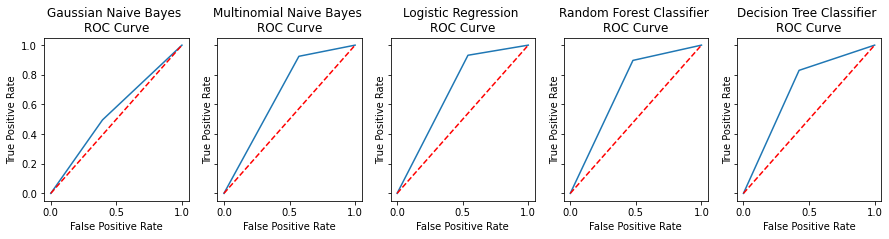

In [55]:
# Generate ROC curve values: fpr, tpr, thresholds
count=0

fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

for name, model in models:
    
    y_pred = model.predict(X_test_df)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    axes[count].plot(fpr, tpr)
    axes[count].plot([0, 1], [0, 1], 'r--')
    axes[count].set_xlabel('False Positive Rate')
    axes[count].set_ylabel('True Positive Rate')
    axes[count].set_title(name +' \nROC Curve')
    count+=1
plt.show()

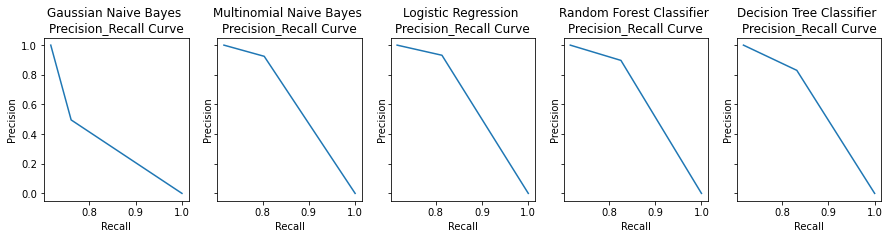

In [58]:
count=0

fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

for name, model in models:
    
    y_pred = model.predict(X_test_df)
    prec, recall, _ = precision_recall_curve(y_test, y_pred)

    axes[count].plot(prec, recall)
    axes[count].set_xlabel('Recall')
    axes[count].set_ylabel('Precision')
    axes[count].set_title(name +' \nPrecision_Recall Curve')
    count+=1
plt.show()


# Human-labelled Data

In [43]:
#import our labelled dataset

human_data = pd.read_csv('data/test_sample_data.csv')
human_data['sentiment']= np.where(human_data['sentiment']=='positive', 1, 0)
human_data.head(3)

,review,sentiment
0,Will no doubt delight Plympton 's legion of fa...,1
1,The pacing is often way off and there are too ...,0
2,Shows moments of promise but ultimately succum...,0
3,"Unless you are in dire need of a Diesel fix , ...",0
4,"Not everything works , but the average is high...",1


In [45]:
# Removing HTML tags using the BeautifulSoup module.
for i in range(len(human_data)):
    human_data['review'][i] = BeautifulSoup(human_data['review'][i]).get_text()

In [46]:
# Removing punctuation
for i in range(len(human_data)):
    human_data['review'][i] = re.sub("[^a-zA-Z]", ' ', human_data['review'][i])

In [47]:
# converting into lowercase and splitting to eliminate stopwords
for i in range(len(human_data)):
    human_data['review'][i] = human_data['review'][i].lower()
    human_data['review'][i] = human_data['review'][i].split()

In [48]:
# setting stopwords and removing them
swords = set(stopwords.words("english"))

for i in range(len(human_data)):
    human_data['review'][i] = [w for w in human_data['review'][i] if w not in swords]               
    human_data['review'][i]= " ".join(human_data['review'][i])

In [49]:
# creating features and targets
X_hd = human_data.drop('sentiment', axis=1)
y_hd  = human_data["sentiment"]

In [50]:
human_result = vect.transform(X_hd['review'])
human_result = human_result.toarray() 

In [51]:
for name, model in models:
    %time human_test_pred = model.predict(human_result)
    print(name, "Accuracy Score :", accuracy_score(y_hd, human_test_pred))
    print(name, "F1 Score :", f1_score(y_hd, human_test_pred, average = "weighted"))
    print("---" * 10)

Wall time: 43.2 ms
Gaussian Naive Bayes Accuracy Score : 0.5247524752475248
Gaussian Naive Bayes F1 Score : 0.529995552746764
------------------------------
Wall time: 7 ms
Multinomial Naive Bayes Accuracy Score : 0.6534653465346535
Multinomial Naive Bayes F1 Score : 0.6352533063525331
------------------------------
Wall time: 5.04 ms
Logistic Regression Accuracy Score : 0.6336633663366337
Logistic Regression F1 Score : 0.6144106381441065
------------------------------
Wall time: 142 ms
Random Forest Classifier Accuracy Score : 0.6435643564356436
Random Forest Classifier F1 Score : 0.6226592767972449
------------------------------
Wall time: 7.98 ms
Decision Tree Classifier Accuracy Score : 0.6138613861386139
Decision Tree Classifier F1 Score : 0.5978950133819352
------------------------------


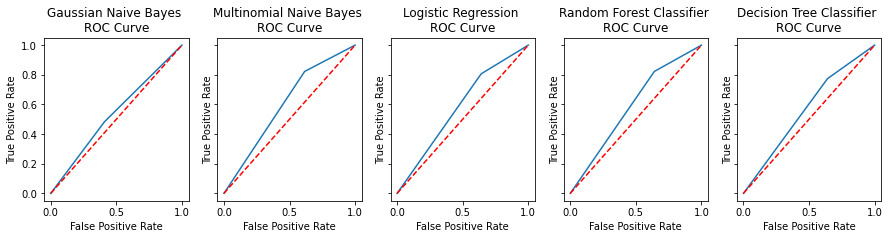

In [59]:
# Generate ROC curve values: fpr, tpr, thresholds
count=0

fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

for name, model in models:
    
    human_test_pred = model.predict(human_result)
    fpr, tpr, thresholds = roc_curve(y_hd, human_test_pred)
    
    axes[count].plot(fpr, tpr)
    axes[count].plot([0, 1], [0, 1], 'r--')
    axes[count].set_xlabel('False Positive Rate')
    axes[count].set_ylabel('True Positive Rate')
    axes[count].set_title(name +' \nROC Curve')
    count+=1
plt.show()

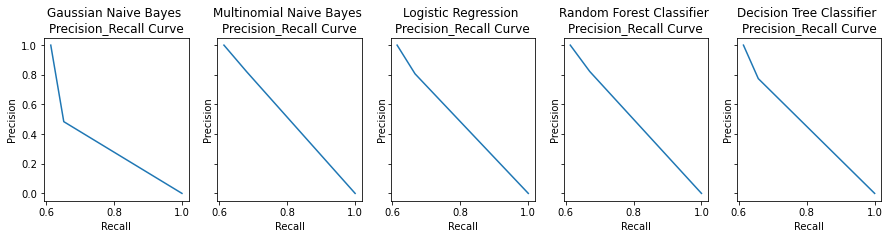

In [60]:
count=0

fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

for name, model in models:
    
    human_test_pred = model.predict(human_result)
    prec, recall, _ = precision_recall_curve(y_hd, human_test_pred)

    axes[count].plot(prec, recall)
    axes[count].set_xlabel('Recall')
    axes[count].set_ylabel('Precision')
    axes[count].set_title(name +' \nPrecision_Recall Curve')
    count+=1
plt.show()

# Unsupervised Models

# How many clusters?

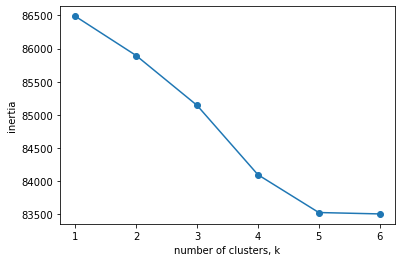

In [27]:
from sklearn.cluster import KMeans

k_space = range(1, 7)
inertias = []

for k in k_space:
    # Create a KMeans instance with k clusters: model
    kmeans=KMeans(n_clusters=k, random_state=42)
    
    # Fit model to samples
    kmeans.fit(my_array)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(k_space, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k_space)
plt.show()


In [22]:
# initialize kmeans with 5 centroids
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans.fit(my_array)
# store cluster labels in a variable
clusters = kmeans.labels_

In [23]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(my_array)
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [24]:
# assign clusters and pca vectors to our dataframe 
df=pd.DataFrame()
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [25]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X_train_vect.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vect.get_feature_names() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
little,well,much,story,director,movie,good,one,like,film

Cluster 1
bad,good,never,story,funny,one,much,movie,film,really

Cluster 2
director,good,one,even,much,like,movie,film,lrb,rrb

Cluster 3
director,well,much,good,time,even,comedy,story,like,one

Cluster 4
made,time,would,bad,even,much,good,like,one,movie


In [92]:
# map clusters to appropriate labels 
cluster_map = {0: "c1", 1: "c2", 2: "c3", 3:"c4", 4:"c5"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

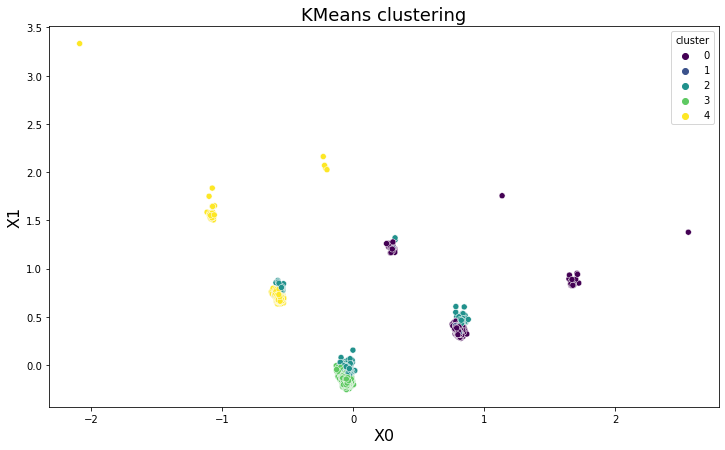

In [26]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

2-cluster case

In [41]:
# initialize kmeans with 2 centroids
kmeans = KMeans(n_clusters=2, random_state=42)
# fit the model
kmeans.fit(my_array)
# store cluster labels in a variable
clusters = kmeans.labels_

In [42]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(my_array)
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [43]:
# assign clusters and pca vectors to our dataframe 
df=pd.DataFrame()
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [44]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X_train_vect.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vect.get_feature_names() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
time,even,comedy,good,lrb,rrb,story,one,movie,film

Cluster 1
feel,much,plays,lrb,rrb,one,feels,film,movie,like


In [45]:
# map clusters to appropriate labels 
cluster_map = {0: "c1", 1: "c2", 2: "c3", 3:"c4", 4:"c5"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

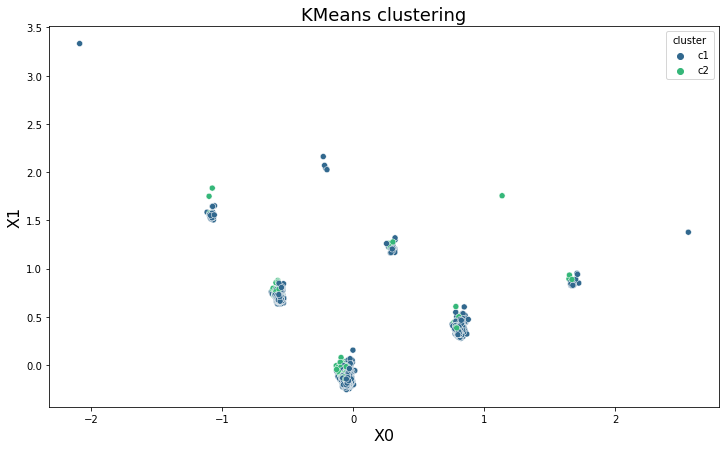

In [46]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()